<a href="https://colab.research.google.com/github/Tejaswarreddy/MyProjects/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-2
### Project : Data Visualization, Build our model
#### Module Coordinator: Sahil Manoj Bhatt
#### Binary Classification on Breast Cancer Dataset


---

#Introduction

Breast cancer is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society. The early diagnosis of Breast cancer can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments.

Benign: Not likely to get cancer-2

Malignant: Likely to get cancer -4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#DataSet Information
Attribute Information:

Sample code number: id number

Clump Thickness: 1 - 10

Uniformity of Cell Size: 1 - 10

Uniformity of Cell Shape: 1 - 10

Marginal Adhesion: 1 - 10

Single Epithelial Cell Size: 1 - 10

Bare Nuclei: 1 - 10

Bland Chromatin: 1 - 10

Normal Nucleoli: 1 - 10

Mitoses: 1 - 10

Class: (2 for benign, 4 for malignant)


In [4]:
data=pd.read_csv("data.csv")
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

We have to change bengin-2 to 0 and malignant-4 to 1 for the binary classification.



In [6]:
data['class'] = data['class'].replace(2,0)
data['class'] = data['class'].replace(4,1)

In [33]:
data= data.replace('?', np.nan)
data = data.fillna(data.median())
data['bare_nucleoli'] = data['bare_nucleoli'].astype('int64')

#Exploratory Data Analysis

In [7]:
print(data.dtypes)

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object


#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


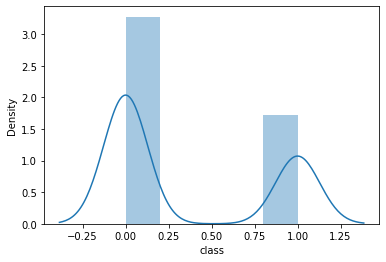

In [10]:
sns.distplot(data['class'])
plt.show()

#Multivariate Analysis

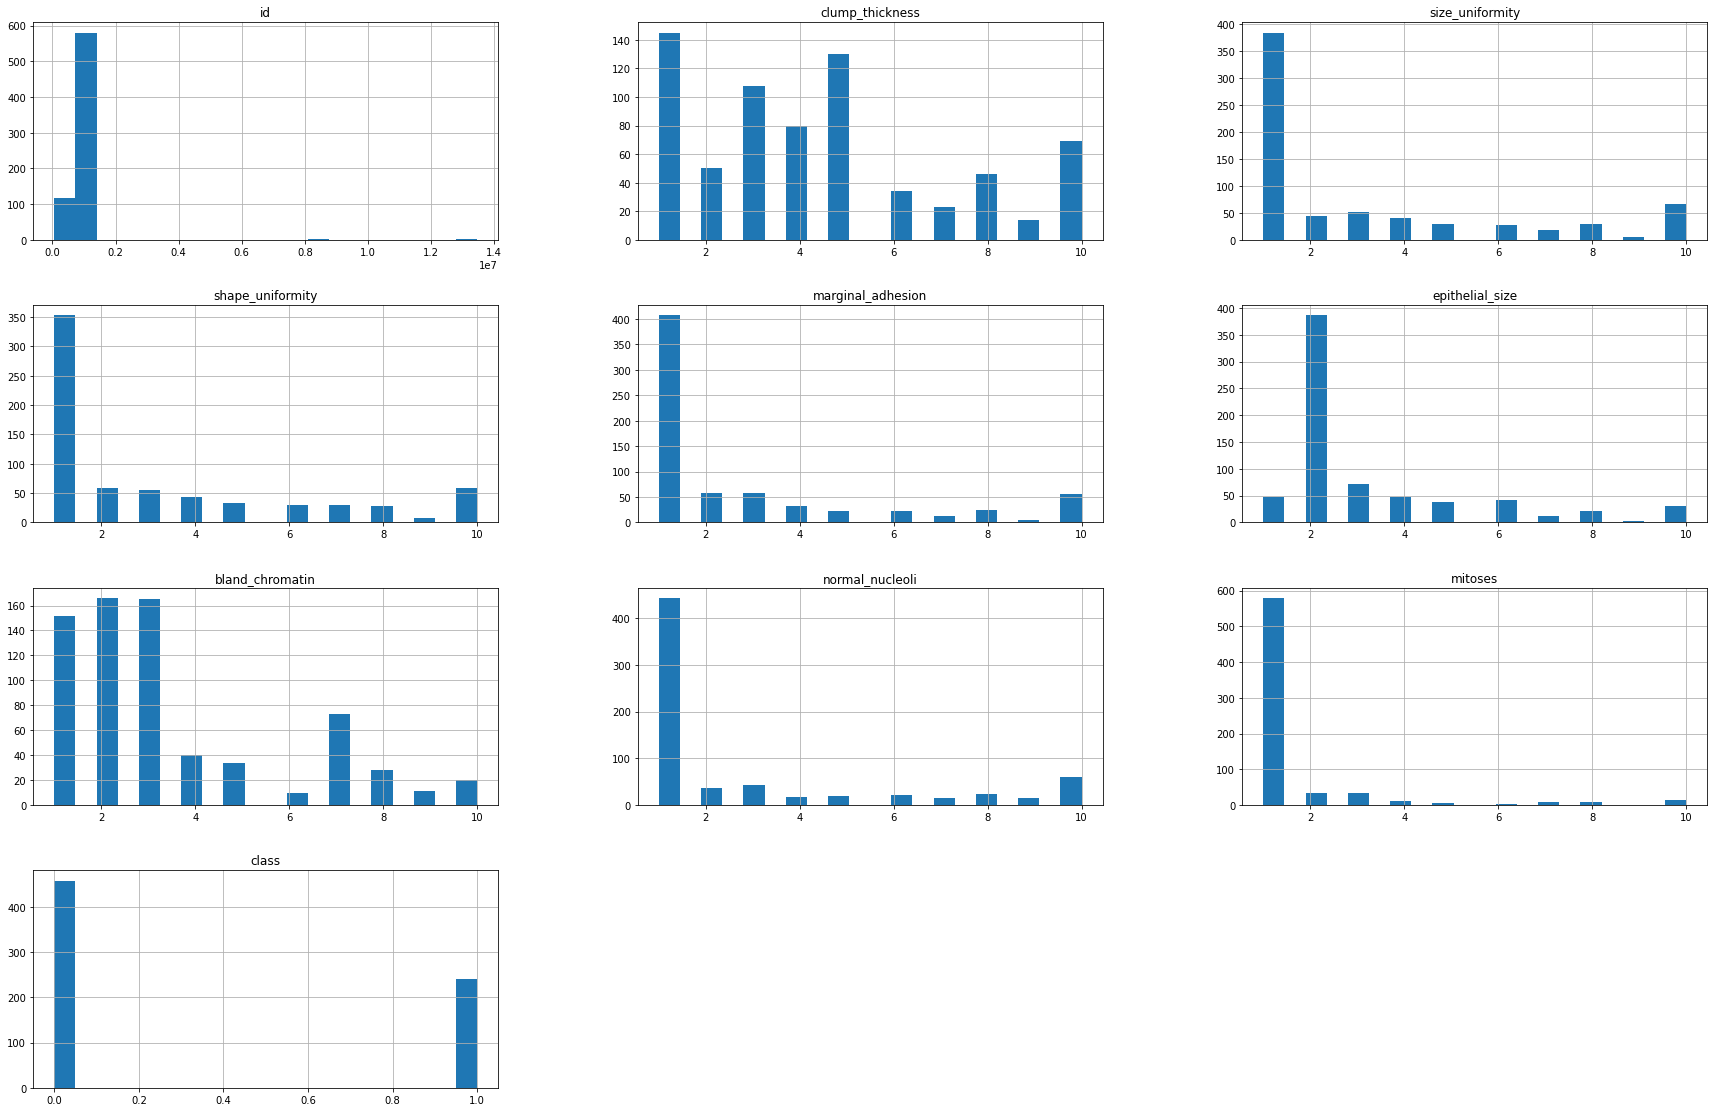

In [12]:
data.hist(bins=20, figsize=(30,30), layout=(6,3));

In [13]:
##Let's find out the correaltion between attributes.

In [21]:
print(data.corr())

                         id  clump_thickness  size_uniformity  \
id                 1.000000        -0.055308        -0.041603   
clump_thickness   -0.055308         1.000000         0.644913   
size_uniformity   -0.041603         0.644913         1.000000   
shape_uniformity  -0.041576         0.654589         0.906882   
marginal_adhesion -0.064878         0.486356         0.705582   
epithelial_size   -0.045528         0.521816         0.751799   
bland_chromatin   -0.060051         0.558428         0.755721   
normal_nucleoli   -0.052072         0.535835         0.722865   
mitoses           -0.034901         0.350034         0.458693   
class             -0.080226         0.716001         0.817904   

                   shape_uniformity  marginal_adhesion  epithelial_size  \
id                        -0.041576          -0.064878        -0.045528   
clump_thickness            0.654589           0.486356         0.521816   
size_uniformity            0.906882           0.705582     

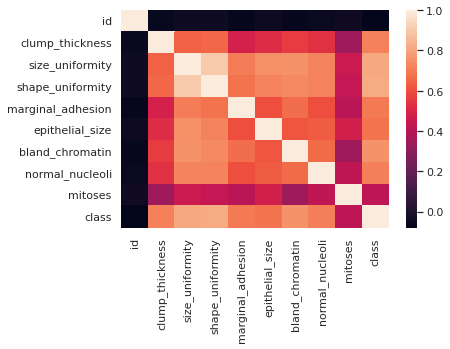

In [24]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(data.corr())

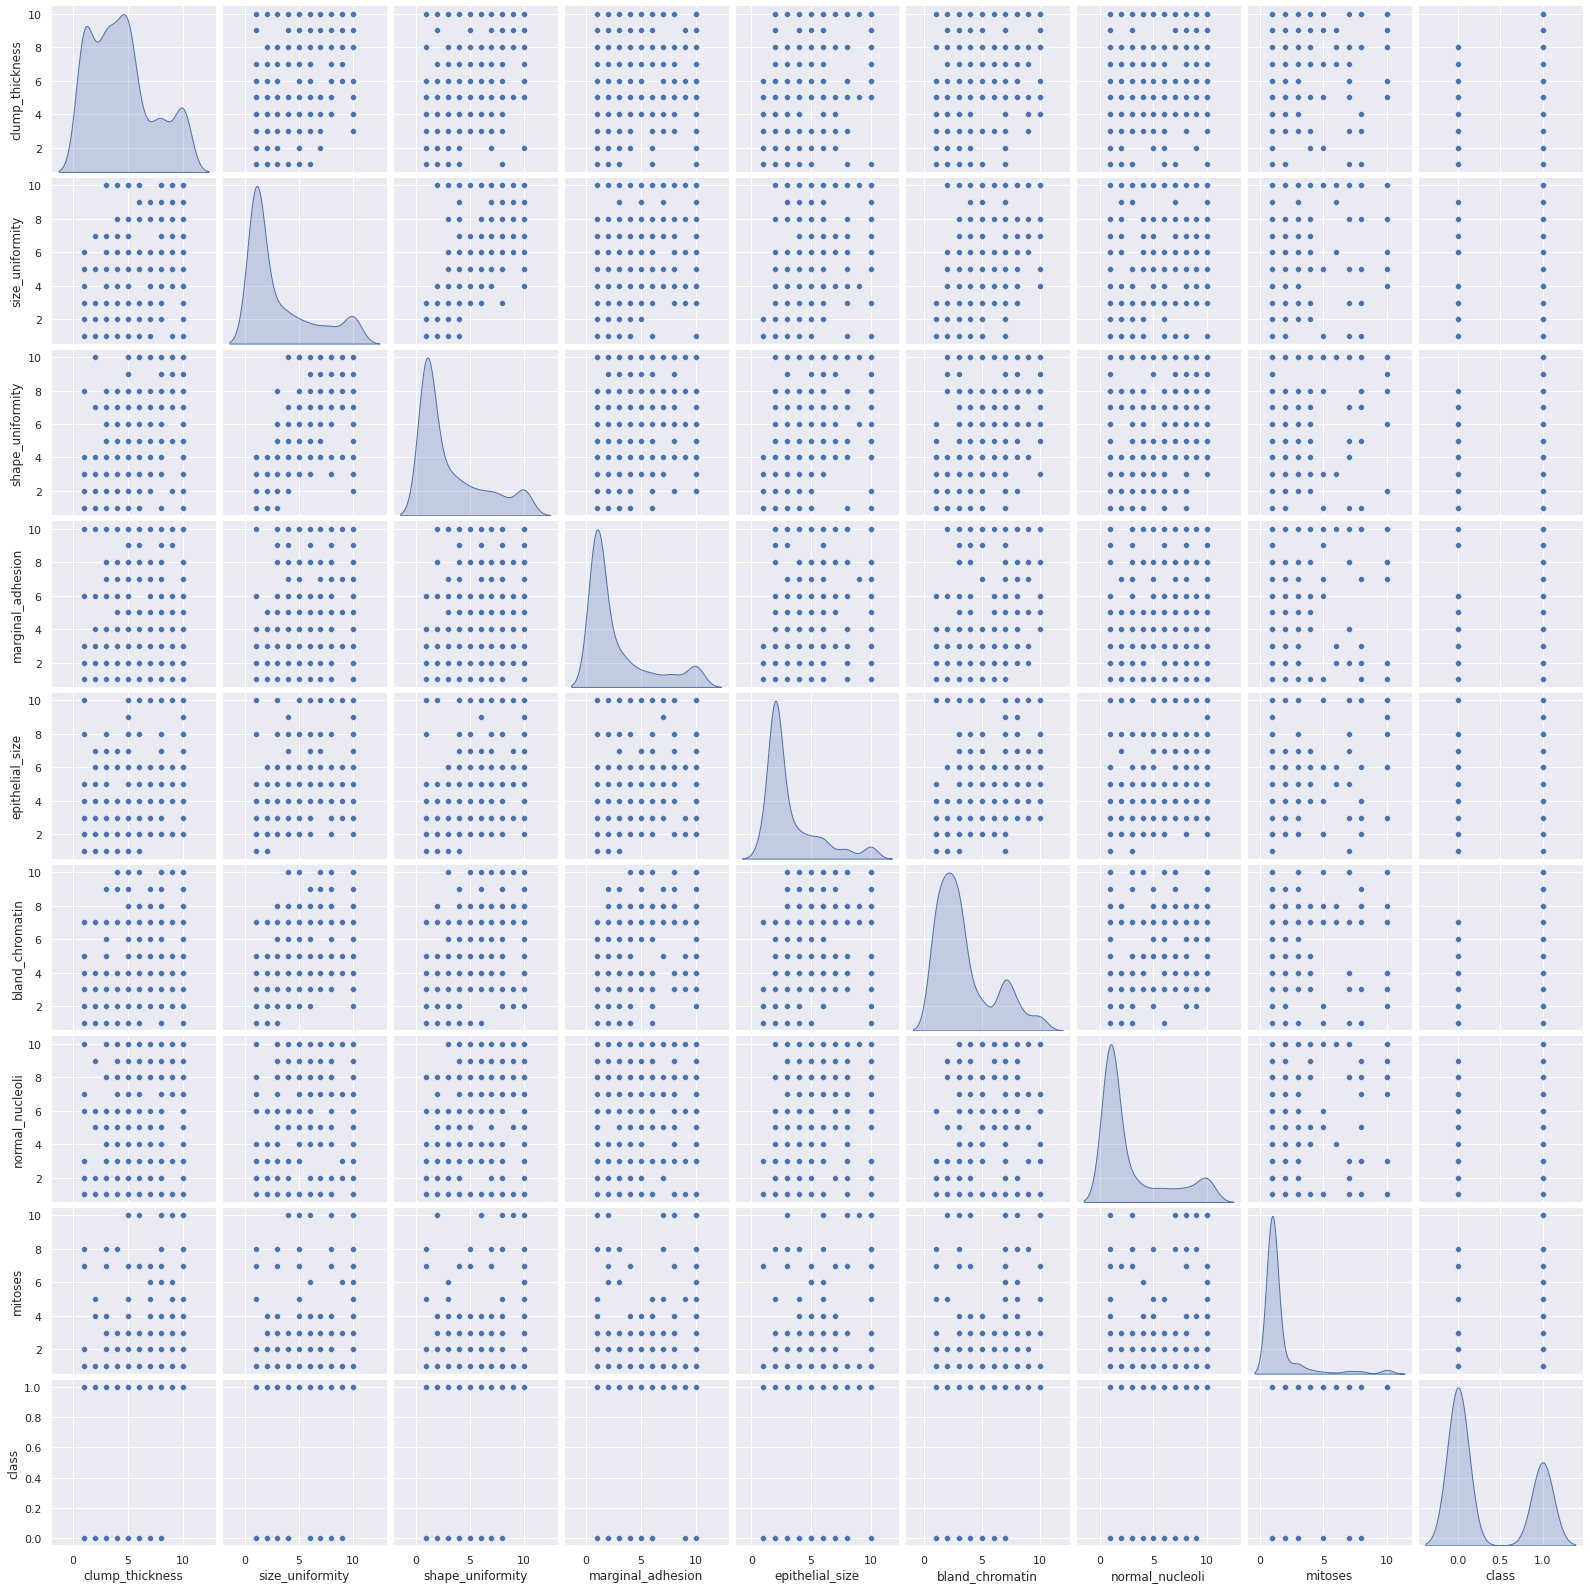

In [25]:
sns.pairplot(data, diag_kind="kde")

In [35]:
# Dividing our dataset into training and testing set

X = data.drop('class', axis=1)
y = data['class'] 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

KNN.fit(X_train, y_train)
KNeighborsClassifier(weights='distance')
X_test

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,1217717,5,1,1,6,3,1,1,1,1
417,1239967,1,1,1,1,2,1,2,1,1
606,353098,4,1,1,2,2,1,1,1,1
349,832567,4,2,3,5,3,8,7,6,1
134,1180831,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
440,608157,10,4,3,10,4,10,10,1,1
299,63375,9,1,2,6,4,10,7,7,2
577,695091,1,1,1,1,2,1,2,1,1
103,1168359,8,2,3,1,6,3,7,1,1


In [39]:
predicted = KNN.predict(X_test)
predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [40]:
from scipy.stats import zscore

print('KNeighborsClassifier Agorithm is predicting at {0:.2g}%'.format(KNN.score(X_test, y_test)*100))

KNeighborsClassifier Agorithm is predicting at 60%
